<a href="https://colab.research.google.com/github/PaulToronto/IBM---AI-Engineering-Professional-Certificate/blob/main/1_3_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.3 Classification

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1.3.1 K-Nearest Neighbours

## 1.3.1.1 Introduction to Classification

- A supervised learning approach
- Categorizing some unknown items into a discrete set of categories or **classes**
- The target attribute is a categorical variable
- Classification can be:
    - Binary classification
    - Multiclass classification
- Use cases
    - Which category a customer belongs to
    - Whether a customer switches to another provider/brand
    - Whether a customer responds to a particular advertising campaign
- Some classification algorithms
    - Decision Trees (ID3, C4.5, C5.0)
    - Naive Bayes
    - Linear Discriminant Analysis
    - k-Nearest Neighbour
    - Logistic Regression
    - Neural Networks
    - Support Vector Machines (SVM)

## 1.3.1.2 k-Nearest Neighbours

In [2]:
data_url = 'https://s3-api.us-geo.objectstorage.softlayer.net/'
data_url += 'cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv'

df = pd.read_csv(data_url)
df = df[(df.age < 65) & (df.income < 225)][:50]
df = df[~(df.index == 8)]
df = df[['age', 'income', 'custcat']]
df.reset_index(inplace=True, drop=True)
df.head(8)

,age,income,custcat
0,44,64.0,1
1,33,136.0,4
2,52,116.0,3
3,33,33.0,1
4,30,30.0,3
5,39,78.0,3
6,22,19.0,2
7,35,76.0,4


- We went to predict the `custcat` for a customer whose `age` is 50 and whose income is `166`
- If we choose `k=1`, we can see that the nearest neighbour is in class 4
- If we choose `k=5`, and do a majority vote, we get class 3

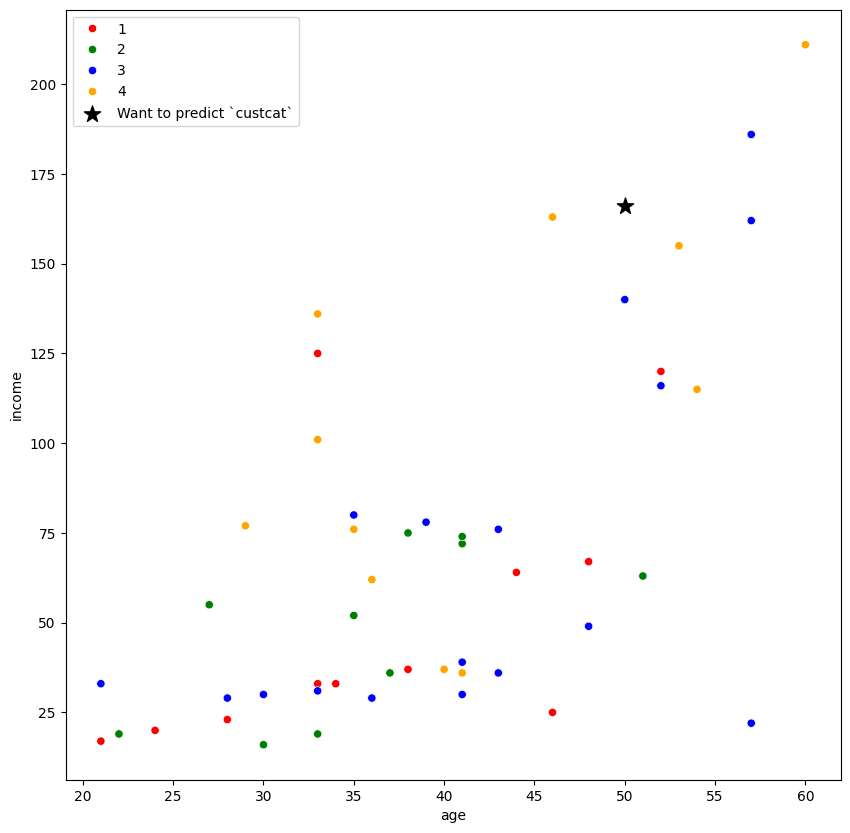

In [3]:
plt.figure(figsize=(10, 10))
sns.scatterplot(df,
                x='age',
                y='income',
                hue='custcat',
                palette=['red', 'green', 'blue', 'orange'])
plt.scatter(50, 166, marker='*', s=150, c='black', label='Want to predict `custcat`')
plt.legend();

### What is k-Nearest Neighbor (KNN)?

- It is a classification algorithm that takes a bunch of labeled points and uses them to learn how to classify other points
- The algorithm classifies cases based on their similarity to other cases
- In KNN, data points that are near each other are said to be neighbors
- Similar cases with the same class labels are near each other
    - Thus, the distance between two cases is a measure of their dissimilarity
- Different ways to calculate the similarity, or conversely, the dissimilarity or distance of two data points
    - Euclidean distance is only one way

### The k-Nearest Neighbors Algorithm

1. Pick a value for `k`
2. Calculate the distance of the unknown case from all cases
3. Search for the `k` observations in the training data that are *nearest* to the unknown data point
4. Predict the response of the unknown data point using the most popular response value from the k-nearest neighbors


### Euclidean Distance

$$
Dis(x_1, x_2) = \sqrt{\sum_{i=0}^{n}\left(x_{1i} - x_{2i}\right)^{2}}
$$

In [4]:
df[:2]

,age,income,custcat
0,44,64.0,1
1,33,136.0,4


$$
\begin{align}
Dis(x_1, x_2) &= \sqrt{\left(44 - 33\right)^2 + \left(64 - 136\right)^{2}} \\
&= \sqrt{11^{2} - (-72)^{2}} \\
&= \sqrt{121 + 5184} \\
&= \sqrt{5305} \\
&= 72.8
\end{align}
$$

In [5]:
dis = lambda x1, x2: np.sqrt(np.sum((x1 - x2)**2))

row1 = df.iloc[0, :-1]
row2 = df.iloc[1, :-1]
dis(row1, row2)

72.83543093852057

In [6]:
# suppose the third parameter is education
row1 = np.array([34, 190, 3])
row2 = np.array([30, 200, 8])

dis(row1, row2)

11.874342087037917

### How to choose `k`

- A low value of `k` causes a highly complex model, which might result in overfitting
- A high value of `k`, then the model becomes overly generalized
- How to choose `k`
    - Reserve a part of your data for testing the accuracy of your model
    - Plot `accuracy` vs. `k` for a number of values of `k`

### Computing continuous targets using KNN

- KNN can also be used for regression
- In this situation, instead of a majority vote, use the mean or median to obtain the predicted value

## 1.3.1.3 Evaluation Metrics in Classification